![](https://cdn.corporate.walmart.com/dims4/WMT/656a07d/2147483647/strip/true/crop/2240x1260+0+0/resize/1200x675!/quality/90/?url=https%3A%2F%2Fcdn.corporate.walmart.com%2F6f%2Fd3%2Ff3f5a16f44a88d88b8059defd0a9%2Foption-signage.jpg)
<div align  = "justify">Walmart is an American retail coorporation that operates chain of hypermarkets,  discount departement store, and grocery stores. The problem is There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.
</div>

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('new_walmart_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.describe().style.background_gradient(cmap = 'YlGnBu')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Week'] = df['Date'].dt.week
df['Month'] =df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop('Date', axis =1, inplace = True)

In [7]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,6,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,39,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,4,40,10,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,4,41,10,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,42,10,2012


In [8]:
for i in df.columns:
    print(f'{i}:{df[i].nunique()}')

Store:45
Weekly_Sales:6435
Holiday_Flag:2
Temperature:3528
Fuel_Price:892
CPI:2145
Unemployment:349
Day:1
Week:52
Month:12
Year:3


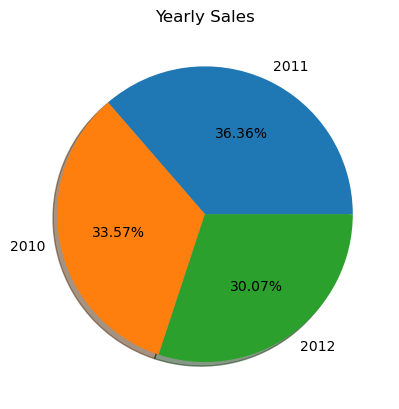

In [9]:
plt.pie(df['Year'].value_counts().values, labels = df['Year'].value_counts().index, shadow = True,
       autopct = '%1.2f%%')
plt.title('Yearly Sales')
plt.show()

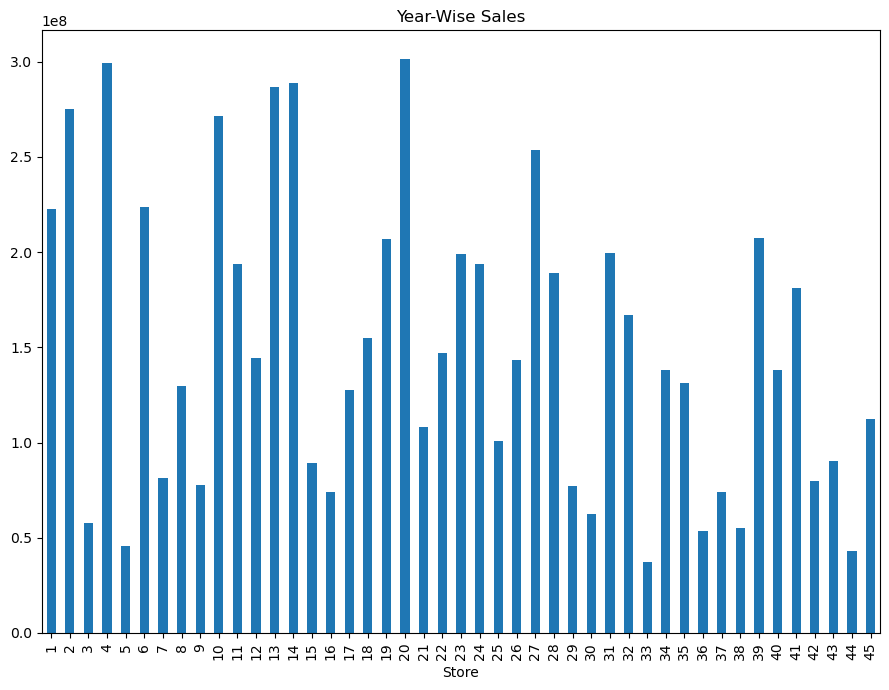

In [10]:
fig = plt.figure(figsize = (9,7))
df.groupby('Store')['Weekly_Sales'].sum().plot(kind = 'bar')
plt.title('Year-Wise Sales')
fig.tight_layout()
plt.show()

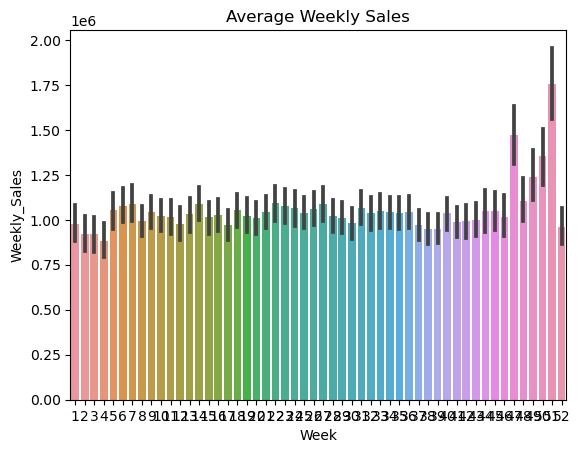

<Figure size 900x900 with 0 Axes>

In [11]:
sns.barplot(df, x = 'Week', y = 'Weekly_Sales')
plt.title('Average Weekly Sales')
plt.figure(figsize = (9,9)).tight_layout()

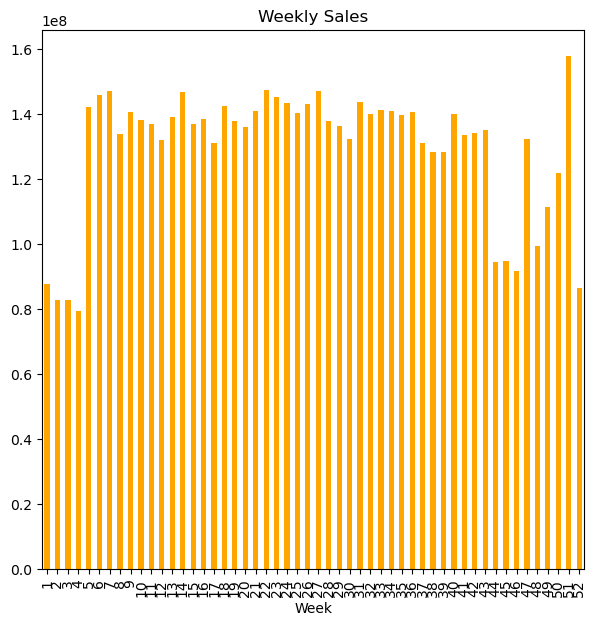

In [12]:
fig = plt.figure(figsize = (7,7))
df.groupby('Week')['Weekly_Sales'].sum().plot(kind = 'bar', color = 'Orange')
plt.title('Weekly Sales')
plt.show()
fig.tight_layout()

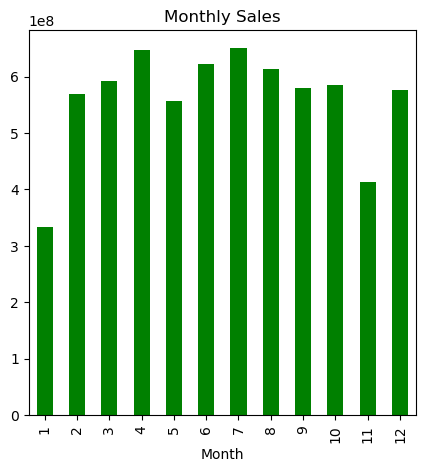

In [13]:
fig = plt.figure(figsize = (5,5))
df.groupby('Month')['Weekly_Sales'].sum().plot(kind = 'bar', color = 'Green')
plt.title('Monthly Sales')
plt.show()
fig.tight_layout()

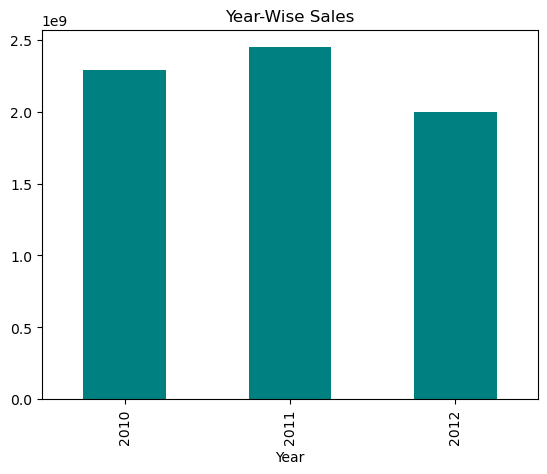

In [14]:
df.groupby('Year')['Weekly_Sales'].sum().plot(kind='bar', color = 'Teal')
plt.title('Year-Wise Sales')

plt.show()

In [15]:
df.groupby('Year')['Weekly_Sales'].mean()

Year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

In [16]:
df2 = df.copy()
months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
df2['Month'] = df2['Month'].map(months)
df2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,5,February,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,6,February,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,9,March,2010


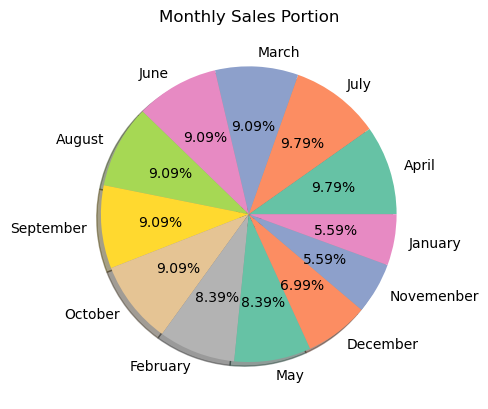

<Figure size 640x480 with 0 Axes>

In [17]:
plt.pie(df2['Month'].value_counts().values, labels = df2["Month"].value_counts().index,
       autopct = '%1.2f%%', shadow = True, colors = sns.color_palette('Set2'));
plt.title('Monthly Sales Portion')
plt.grid()
plt.figure().tight_layout()

In [18]:
#monthly_sales = pd.pivot_table(df2, index = 'Month', columns='Year', values = 'Weekly_Sales')
#monthly_sales.plot()

<Axes: xlabel='Year', ylabel='Weekly_Sales'>

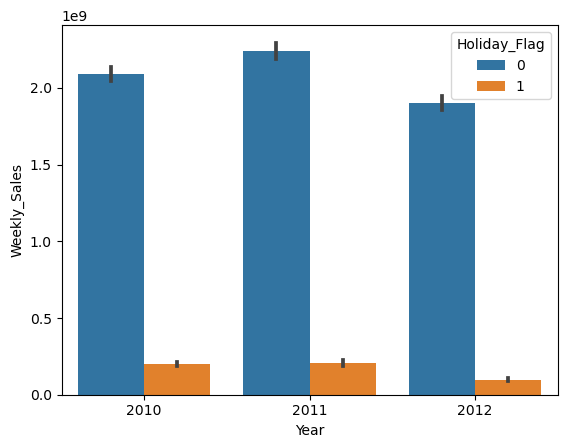

In [19]:
sns.barplot(df2, x = 'Year', y = 'Weekly_Sales', hue = 'Holiday_Flag', estimator = 'sum')

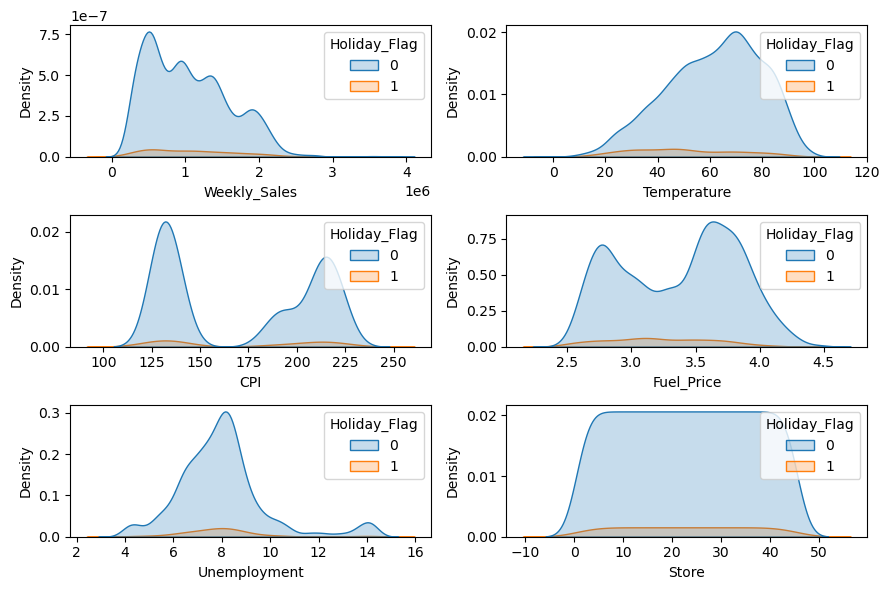

In [31]:
num = ['Weekly_Sales', 'Temperature', 'CPI', 'Fuel_Price', 'Unemployment', 'Store']
n = 1
fig = plt.figure(figsize= (9,6))
for i in num:
    plt.subplot(3,2,n)
    sns.kdeplot(data = df, x = df[i], fill=True, hue = df['Holiday_Flag'])
    n += 1
fig.tight_layout()

In [24]:
from scipy.stats import skew, kurtosis
for i in num:
    print(f'skewness of {i}: {df[i].skew()}')
    print(f'kurtosis of {i}: {df[i].kurtosis()}')

skewness of Weekly_Sales: 0.6683617974864524
kurtosis of Weekly_Sales: 0.05314092741722032
skewness of Temperature: -0.3367676011075799
kurtosis of Temperature: -0.6128009588453383
skewness of CPI: 0.06349184988549494
kurtosis of CPI: -1.8398133421838165
skewness of Fuel_Price: -0.09615830011865549
kurtosis of Fuel_Price: -1.1773777964906604
skewness of Unemployment: 1.1881439334843265
kurtosis of Unemployment: 2.639711784234234
skewness of Store: 0.0
kurtosis of Store: -1.2011866346083275


<div align = 'justify'> Almost all data's skewness is nearly zero (except <strong> Unemployment </strong> feature) and few of them are negative. The Store feature is normally distributed (skewness = 0), whereas another feature is not as well as Store ($skewness < 0$ or $skewness > 0$). <strong>Temperature</strong> and <strong>Fuel_Price</strong> have minus skewness which means that more weight in the RIGHT TAIL of the distribution, whereas the rest of the feature have more weight in the LEFT TAIL. Kurtosis of the feature is mostly playkurtic. </div>

## Encode and Modelling

In [32]:
x = df.drop(['Weekly_Sales'], axis = 1)
y = df['Weekly_Sales']

In [33]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
x_ = ssc.fit_transform(x)
x_

array([[-1.69397911, -0.27420425, -0.99513556, ..., -1.47352983,
        -1.37352517, -1.21089907],
       [-1.69397911,  3.64691651, -1.20117022, ..., -1.40274892,
        -1.37352517, -1.21089907],
       [-1.69397911, -0.27420425, -1.12417832, ..., -1.33196801,
        -1.37352517, -1.21089907],
       ...,
       [ 1.69397911, -0.27420425, -0.33582468, ...,  1.07458289,
         1.09709243,  1.29864538],
       [ 1.69397911, -0.27420425, -0.22738539, ...,  1.1453638 ,
         1.09709243,  1.29864538],
       [ 1.69397911, -0.27420425, -0.09834264, ...,  1.21614471,
         1.09709243,  1.29864538]])

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_,y, test_size=0.25, random_state=40)

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [42]:
def model(feat_train, feat_test, label_train, label_test, model):
    model = model()
    model.fit(feat_train, label_train)
    data = pd.DataFrame({'Test Data' : label_test},
                   {'Prediction': model.predict(feat_test)})
    r2_score(y_test, model.predict(feat_test))
    print('-'.format(100,'~'))
    print(model)
    print('-'.format(100,'~'))
    print(f'Mean Squared Error {mean_squared_error(label_test, model.predict(feat_test))}')
    print(f'Mean Absolute Error {mean_absolute_error(label_test, model.predict(feat_test))}')
    print(f'R2 score {round(r2_score(label_test, model.predict(feat_test)),3)}')

In [43]:
x = [model(x_train, x_test, y_train, y_test, i) for i in [LinearRegression, KNeighborsRegressor, DecisionTreeRegressor, 
                                                         GradientBoostingRegressor]]
x

-
LinearRegression()
-
Mean Squared Error 267144389142.95502
Mean Absolute Error 427906.3866528465
R2 score 0.115
-
KNeighborsRegressor()
-
Mean Squared Error 142139420307.703
Mean Absolute Error 260039.62227967684
R2 score 0.529
-
DecisionTreeRegressor()
-
Mean Squared Error 15786665256.548382
Mean Absolute Error 69930.96374145431
R2 score 0.948
-
GradientBoostingRegressor()
-
Mean Squared Error 28703669547.714066
Mean Absolute Error 129710.34302500711
R2 score 0.905


[None, None, None, None]

In [ ]:
s

# Additional Page (Forecasting Walmart Store 1)

___
## Import Package and Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('new_walmart_data.csv')
data.rename(columns={"Date":"ds" , "Weekly_Sales":"output"}, inplace = True)
data['ds'] = pd.to_datetime(data['ds'], format = '%Y-%m-%d')
data

,Store,ds,output,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [21]:
def brief_analysis (dataframe):
    print('Shape'.center(100,"~"))
    print(dataframe.shape)
    print('Duplicate'.center(100,'~'))
    print(dataframe.duplicated().sum())
    print('Null Data'.center(100,'~'))
    print(dataframe.isnull().sum())
    print('Info'.center(100,'~'))
    print(dataframe.info())
    print('Describe'.center(100,'~'))
    print(dataframe.describe())

In [22]:
brief_analysis(data)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Shape~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(6435, 8)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Duplicate~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Null Data~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Store           0
ds              0
output          0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Info~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   ds            6435 non-null   datetime64[ns]
 2   output        6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   64

In [5]:
"""
Extract data only for Store 1
"""
store_1 = pd.DataFrame(data[data['Store']==1])
store_1

,Store,ds,output,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573


***
## Trends and Forecasting

In [20]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.rc('figure',
      autolayout = True,
      figsize = (11,4),
      titlesize = 18,
      titleweight ='bold')
plt.rc('axes', 
      labelweight = 'bold',
      labelsize = 'large',
      titlesize = 14,
      titlepad = 10)
plot_params = dict(color = '0.75',
                  style = '.-',
                  markeredgecolor = '0.25',
                  markerfacecolor = '0.35',
                  legend = False)

In [7]:
store_1 = store_1.set_index('ds').to_period()

In [8]:
store_1['time'] = np.arange(len(store_1.index))
X = store_1.loc[:, ['time']]
y = store_1.loc[:, 'output']

model = LinearRegression()
model.fit(X,y)

result = pd.Series(model.predict(X), X.index)

Text(0, 0.5, 'Weekly Sales')

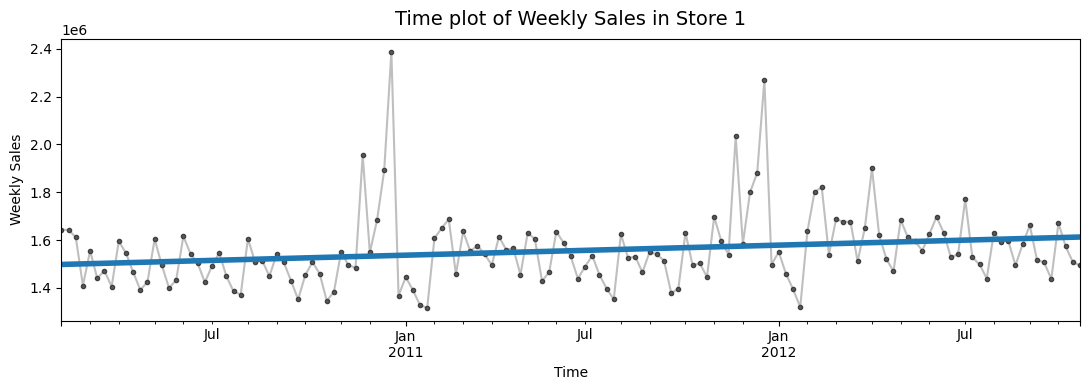

In [9]:
ax = y.plot(**plot_params)
ax = result.plot(ax=ax, linewidth = 4)
ax.set_title('Time plot of Weekly Sales in Store 1')
ax.set_xlabel('Time')
ax.set_ylabel('Weekly Sales')

In [10]:
from statsmodels.tsa.deterministic import DeterministicProcess

store_1_price = store_1[[ 'output']]
dp = DeterministicProcess(index = store_1_price.index,
                         constant = True,
                         order = 1,
                         drop = True)
X = dp.in_sample()
X.head()

,const,trend
ds,,
2010-01-30/2010-02-05,1.0,1.0
2010-02-06/2010-02-12,1.0,2.0
2010-02-13/2010-02-19,1.0,3.0
2010-02-20/2010-02-26,1.0,4.0
2010-02-27/2010-03-05,1.0,5.0


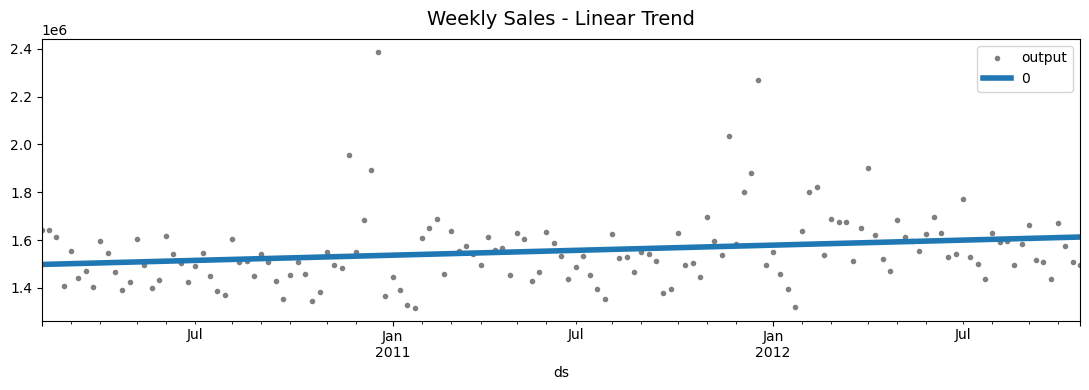

In [11]:
#store_1_price['Lag_1'] = store_1_price['output'].shift(1)
y = store_1_price['output']
model_2 = LinearRegression(fit_intercept=False)
model_2.fit (X,y)
y_pred = pd.DataFrame(model_2.predict(X), index = X.index)
ax = store_1_price.plot(style = '.', color = '0.5', title = 'Weekly Sales - Linear Trend')
_ = y_pred.plot(ax=ax, linewidth = 4, label = 'Trend')

In [12]:
X_fore = dp.out_of_sample(steps = 30)
y_forecast = pd.Series(model_2.predict(X_fore), index = X_fore.index)
y_forecast.head()

2012-10-27/2012-11-02    1.613428e+06
2012-11-03/2012-11-09    1.614236e+06
2012-11-10/2012-11-16    1.615044e+06
2012-11-17/2012-11-23    1.615852e+06
2012-11-24/2012-11-30    1.616659e+06
Freq: W-FRI, dtype: float64

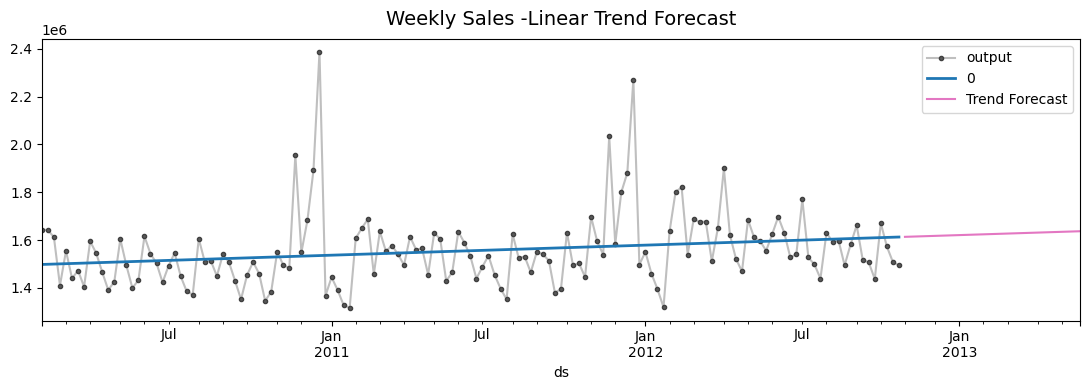

In [13]:
ax = store_1_price['2010-02':].plot(title = 'Weekly Sales -Linear Trend Forecast', **plot_params)
ax = y_pred['2010-02':].plot(ax=ax, linewidth=2, label = 'Trend')
ax = y_forecast.plot(ax=ax, label = 'Trend Forecast', color = 'C6')
_ = ax.legend()

In [14]:
#from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [15]:
store_1_con_data = store_1.drop(['Holiday_Flag', 'Store'], axis = 1)
store_1_con_data

,output,Temperature,Fuel_Price,CPI,Unemployment,time
ds,,,,,,
2010-01-30/2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,0
2010-02-06/2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,1
2010-02-13/2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,2
2010-02-20/2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,3
2010-02-27/2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,4
...,...,...,...,...,...,...
2012-09-22/2012-09-28,1437059.26,76.08,3.666,222.981658,6.908,138
2012-09-29/2012-10-05,1670785.97,68.55,3.617,223.181477,6.573,139
2012-10-06/2012-10-12,1573072.81,62.99,3.601,223.381296,6.573,140


In [16]:
num_data = ['output', 'Temperature', 'Fuel_price', 'CPI']
store_1_con_data['Time'] = np.arange(len(store_1_con_data))
store_1_con_data

,output,Temperature,Fuel_Price,CPI,Unemployment,time,Time
ds,,,,,,,
2010-01-30/2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,0,0
2010-02-06/2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,1,1
2010-02-13/2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,2,2
2010-02-20/2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,3,3
2010-02-27/2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,4,4
...,...,...,...,...,...,...,...
2012-09-22/2012-09-28,1437059.26,76.08,3.666,222.981658,6.908,138,138
2012-09-29/2012-10-05,1670785.97,68.55,3.617,223.181477,6.573,139,139
2012-10-06/2012-10-12,1573072.81,62.99,3.601,223.381296,6.573,140,140


In [17]:
def Linear (y_data):
    X = store_1_con_data.loc[:,['Time']]
    y = store_1_con_data.loc[:,y_data]
    model.fit(X,y)
    result = pd.Series(model.predict(X), X.index)
    return y, result
Linear('Temperature')

(ds
 2010-01-30/2010-02-05    42.31
 2010-02-06/2010-02-12    38.51
 2010-02-13/2010-02-19    39.93
 2010-02-20/2010-02-26    46.63
 2010-02-27/2010-03-05    46.50
                          ...  
 2012-09-22/2012-09-28    76.08
 2012-09-29/2012-10-05    68.55
 2012-10-06/2012-10-12    62.99
 2012-10-13/2012-10-19    67.97
 2012-10-20/2012-10-26    69.16
 Freq: W-FRI, Name: Temperature, Length: 143, dtype: float64,
 ds
 2010-01-30/2010-02-05    64.543683
 2010-02-06/2010-02-12    64.596684
 2010-02-13/2010-02-19    64.649686
 2010-02-20/2010-02-26    64.702687
 2010-02-27/2010-03-05    64.755689
                            ...    
 2012-09-22/2012-09-28    71.857878
 2012-09-29/2012-10-05    71.910879
 2012-10-06/2012-10-12    71.963881
 2012-10-13/2012-10-19    72.016882
 2012-10-20/2012-10-26    72.069883
 Freq: W-FRI, Length: 143, dtype: float64)

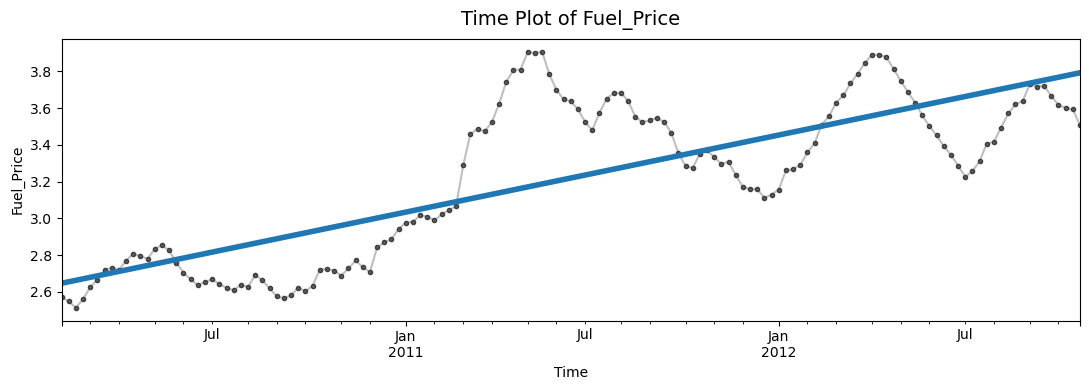

In [18]:
def plot (y_data):
    y, result =  Linear(y_data)
    ax = y.plot(**plot_params)
    ax = result.plot(ax=ax, linewidth = 4)
    ax.set_title(f'Time Plot of {y_data}')
    ax.set_ylabel(y_data)
    ax.set_xlabel('Time')
plot('Fuel_Price')

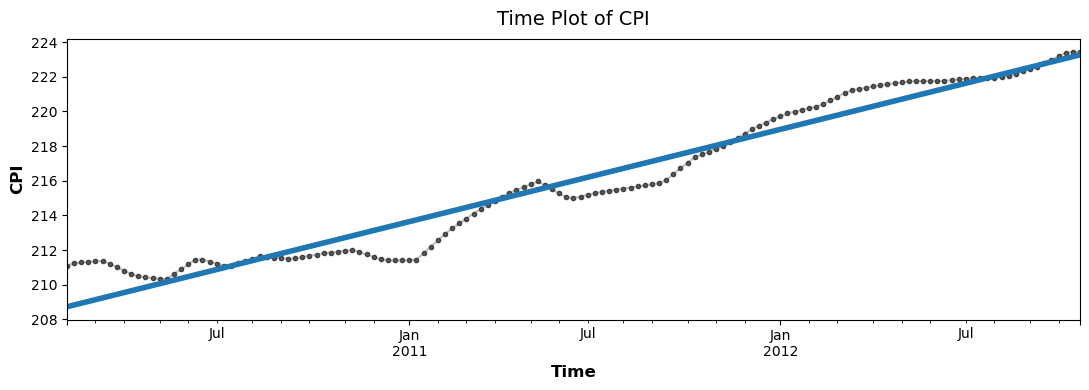

In [42]:
plot('CPI')

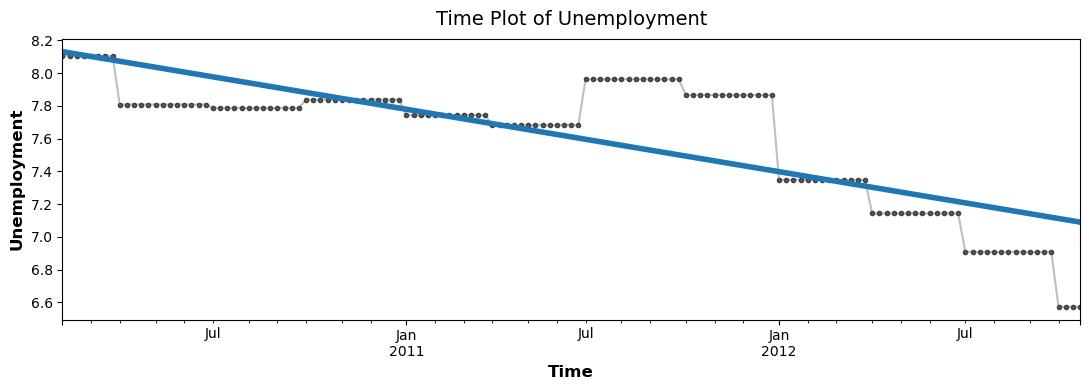

In [43]:
plot('Unemployment')